# Scale-Invariant Feature Transform (SIFT)

Check a no-code implementation to SIFT using Roboflow in the following post.

[How to Use Scale-Invariant Feature Transform (SIFT)](https://https://blog.roboflow.com/computer-vision-sift/)

## Get Images

Download images for this notebook [here](https://github.com/tim3in/image-processing/tree/main/images/sift).

## Import Required Libraries

In [1]:
import numpy as np
import cv2 as cv
import json
import matplotlib.pyplot as plt

## SIFT Implementation

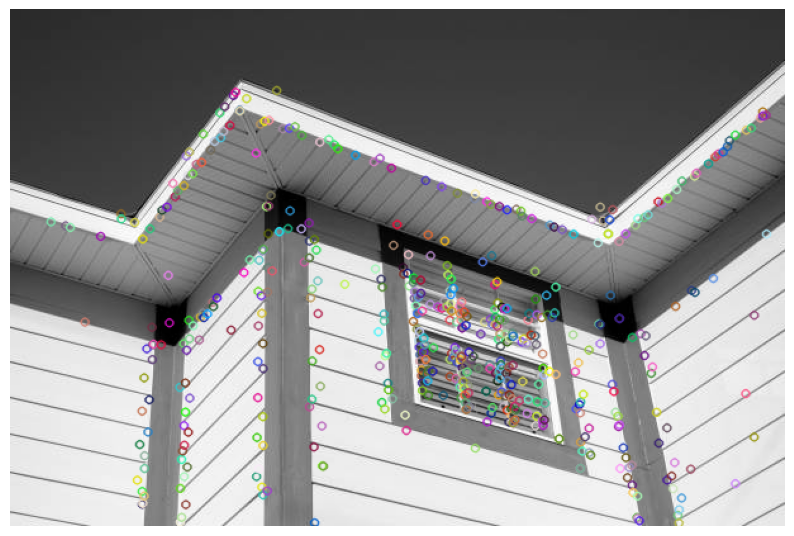

In [9]:
# Load the image
img = cv.imread('house.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect keypoints
kp = sift.detect(gray, None)

# Draw keypoints on the image
img_with_kp = cv.drawKeypoints(gray, kp, img)

# Convert the image from BGR to RGB for displaying with matplotlib
img_with_kp_rgb = cv.cvtColor(img_with_kp, cv.COLOR_BGR2RGB)
# Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(img_with_kp_rgb)
plt.axis('off')
plt.show()

## Detecting keypoints in ROI

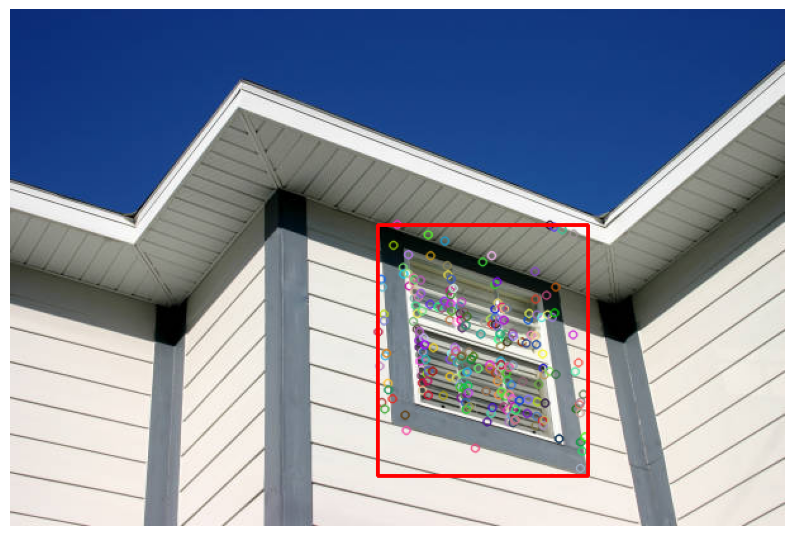

In [ ]:
# Load the image
img = cv.imread('house.jpg')  # Replace with the actual image file
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create a mask: initialize with zeros (black)
mask = np.zeros(gray.shape, dtype=np.uint8)

# Define ROI coordinates
x_start, y_start = 290, 170
x_end, y_end = 456, 368

# Set the ROI in the mask to white (255)
mask[y_start:y_end, x_start:x_end] = 255

# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect keypoints using the mask
kp = sift.detect(gray, mask)

# Draw keypoints on the image
img_with_kp = cv.drawKeypoints(img, kp, None)

# Highlight the ROI with a rectangle (in red for visibility)
cv.rectangle(img_with_kp, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)  # Red rectangle, thickness=2

# Convert the image from BGR to RGB for displaying with matplotlib
img_with_kp_rgb = cv.cvtColor(img_with_kp, cv.COLOR_BGR2RGB)

# Display the image with keypoints and highlighted ROI
plt.figure(figsize=(10, 10))
plt.imshow(img_with_kp_rgb)
plt.axis('off')
plt.show()


## Parameters of SIFT_create()

*Syntax:*

`SIFT_create(nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)`


*Parameters:*

*   **nfeatures (default: 0)**: It specifies maximum number of keypoints to retain. If this value is set to 0, all keypoints detected by the algorithm will be kept. Use if you only need a certain number of keypoints (e.g., for performance reasons), you can set a limit using this parameter.
*   **nOctaveLayers (default: 3)**: It specifies the number of layers in each octave. Increasing this number may increase the detection of keypoints at different scales, but it also increases computational cost. A higher value will increase the accuracy at different scales but slow down the algorithm.
*   **contrastThreshold (default: 0.04)**: The contrast threshold is used to filter out weak keypoints. Keypoints with lower contrast are likely to be noise, so they are discarded. Decreasing this value will allow weaker keypoints to be kept, but it may also increase noise in the keypoints. Lower this value to detect more keypoints in low-contrast images, but this might result in more noise.
*   **edgeThreshold (default: 10)**: This parameter filters out keypoints that are sensitive to edge-like structures, which can lead to unstable keypoints. A higher value allows more edge-like keypoints, while a lower value excludes them. Increase this value to detect more keypoints along edges but be aware that this might result in less stable keypoints.
*   **sigma (default: 1.6)**:  The sigma value used in the Gaussian filter applied to the input image at the first octave. This value affects the scale at which keypoints are detected. Changing this value alters how blurred the input image becomes. A higher value leads to larger features being detected.


In [ ]:
# An example of detecting 20 bes keypoints using parameter 'nfeatures'
# Load the image
img = cv.imread('house.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create(nfeatures=20)

# Detect keypoints
kp = sift.detect(gray, None)

# Draw keypoints on the image
img_with_kp = cv.drawKeypoints(gray, kp, img)

# Convert the image from BGR to RGB for displaying with matplotlib
img_with_kp_rgb = cv.cvtColor(img_with_kp, cv.COLOR_BGR2RGB)
# Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(img_with_kp_rgb)
plt.axis('off')
plt.show()

## Setting FLAGS for keypoints

*   **cv.DRAW_MATCHES_FLAGS_DEFAULT**: Draws keypoints with simple circles.
*   **cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS**: Draws keypoints with size and orientation, making keypoints richer (useful for blob detection).
*   **cv.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG**: Draws keypoints on an output image, leaving the original image unchanged.
*   **cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS**: Draws only keypoints that are part of matching pairs (often used when drawing matches between two images).


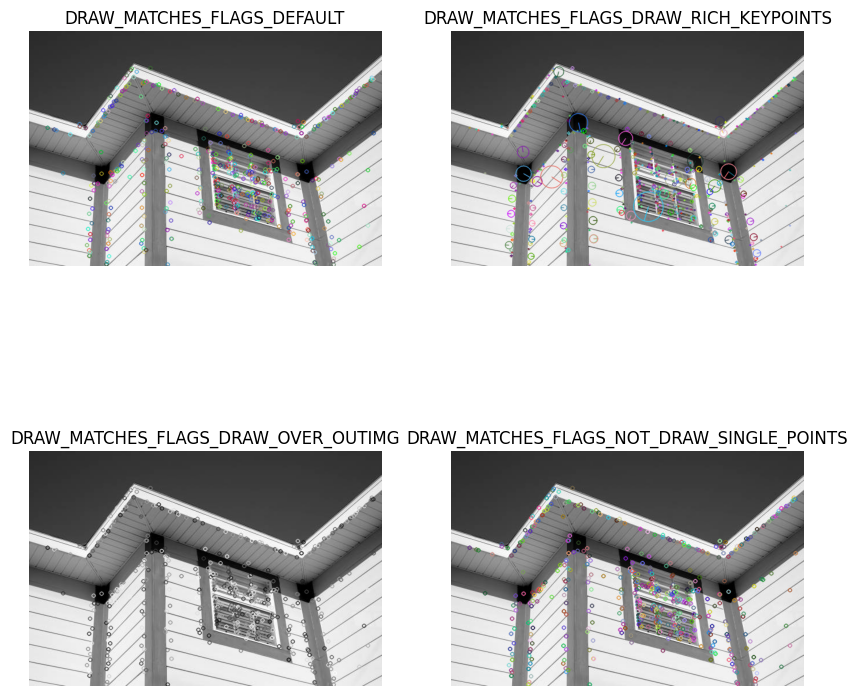

In [11]:
# Load the image
img = cv.imread('house.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()
kp = sift.detect(gray, None)

# Define different flags to be used for drawing keypoints
flags = [
    cv.DRAW_MATCHES_FLAGS_DEFAULT,
    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    cv.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG,
    cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
]

# Titles corresponding to the flags
flag_titles = [
    "DRAW_MATCHES_FLAGS_DEFAULT",
    "DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS",
    "DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG",
    "DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS"
]

# Plot the images with keypoints using different flags
plt.figure(figsize=(10, 10))
for i, flag in enumerate(flags):
    # Draw keypoints on the image using the current flag
    img_with_kp = cv.drawKeypoints(gray, kp, gray, flags=flag)

    # Convert the image from BGR to RGB for displaying with matplotlib
    img_with_kp_rgb = cv.cvtColor(img_with_kp, cv.COLOR_BGR2RGB)

    # Display the image with keypoints
    plt.subplot(2, 2, i+1)
    plt.imshow(img_with_kp_rgb)
    plt.title(flag_titles[i])
    plt.axis('off')

plt.show()


## Detecting descriptor

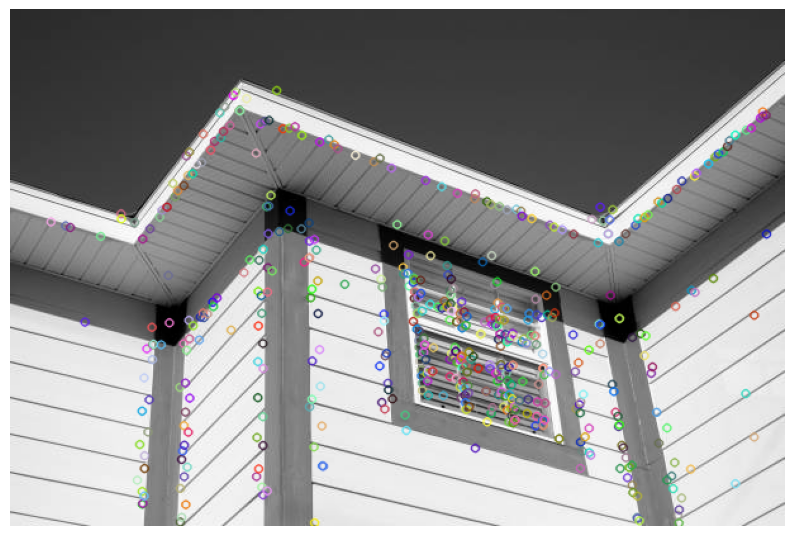

Descriptor for the first keypoint:
 [  1.   5.   9.   2.   2.   1.   0.   0. 128.  12.   3.   7.  14.   2.
   0.   0. 214.  29.   0.   0.   0.   0.   0.   1.  33.   4.   0.   0.
   0.   0.   0.   3.   0.  14.  27.   1.   1.   6.  23.   1. 145.  18.
  20.   7.   6.   6.   9.   2. 214.  37.   0.   0.   0.   0.   0.   2.
  53.   3.   0.   0.   0.   0.   1.   5.   2.   3.   1.   0.   0.  11.
  28.   2. 117.   5.   1.   0.   2.  28.  18.   6. 214.  33.   0.   0.
   0.   1.   1.   4.  69.   7.   0.   0.   0.   0.   1.   2.   3.   1.
   0.   0.   0.   0.   1.   2.  69.   4.   0.   2.   5.   5.   1.   2.
 214.  27.   0.   0.   0.   1.   0.   2.  67.   5.   0.   0.   0.   0.
   0.   2.]


In [ ]:
# Load the image
img = cv.imread('house.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect keypoints (without descriptors)
keypoints = sift.detect(gray, None)

# Compute descriptors for the detected keypoints
keypoints, descriptors = sift.compute(gray, keypoints)

# Draw the keypoints on the image
img_with_keypoints = cv.drawKeypoints(gray, keypoints, img)

# Convert the image from BGR to RGB for displaying with matplotlib
img_with_keypoints_rgb = cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB)

# Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(img_with_keypoints_rgb)
plt.axis('off')
plt.show()

# Print some descriptors
print("Descriptor for the first keypoint:\n", descriptors[0])


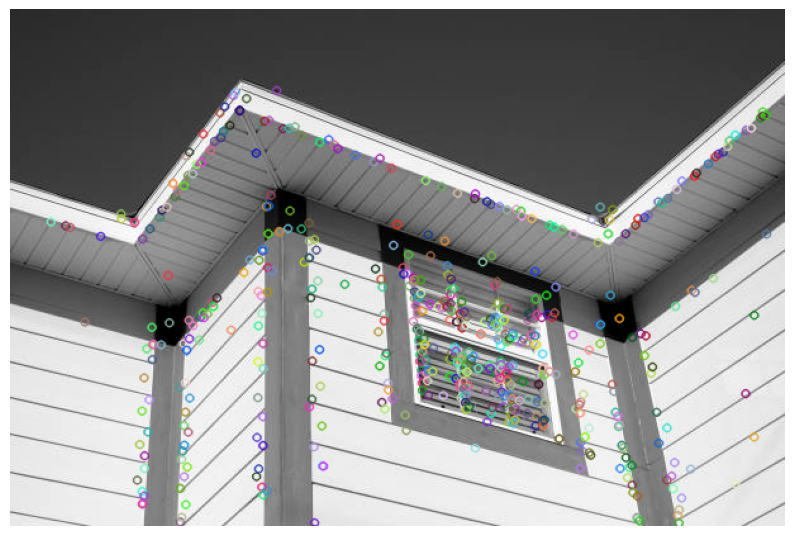

Number of keypoints: 514
Shape of descriptors: (514, 128)


In [ ]:
# Load the image
img = cv.imread('house.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_kp = cv.drawKeypoints(gray, keypoints, None)

# Convert the image from BGR to RGB for displaying with matplotlib
img_with_kp_rgb = cv.cvtColor(img_with_kp, cv.COLOR_BGR2RGB)

# Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(img_with_kp_rgb)
plt.axis('off')
plt.show()

# Print out information
print(f"Number of keypoints: {len(keypoints)}")
print(f"Shape of descriptors: {descriptors.shape}")


## Application of SIFT: Finding Object

{
  "status": "PASS",
  "keypoints_detected": 172
}


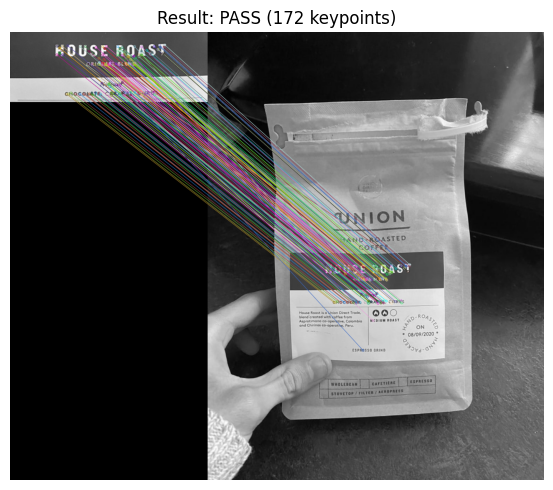

In [8]:
def find_object(object_image_path, scene_image_path, min_keypoints=100):
    # Read the object and scene images
    object_img = cv.imread(object_image_path, cv.IMREAD_GRAYSCALE)
    scene_img = cv.imread(scene_image_path, cv.IMREAD_GRAYSCALE)

    # Initialize SIFT detector
    sift = cv.SIFT_create()

    # Find keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(object_img, None)
    kp2, des2 = sift.detectAndCompute(scene_img, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    # FLANN-based matcher
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # Store good matches using Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Prepare result
    num_keypoints = len(good_matches)
    result = {
        "status": "PASS" if num_keypoints >= min_keypoints else "FAIL",
        "keypoints_detected": num_keypoints
    }

    # Visualize results
    img_matches = cv.drawMatches(object_img, kp1, scene_img, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(15, 5))
    plt.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))
    plt.title(f"Result: {result['status']} ({result['keypoints_detected']} keypoints)")
    plt.axis('off')
    plt.tight_layout()

    return result, 'output_visualization.png'

# Example usage
object_image_path = 'label.png'
scene_image_path = 'coffee package.jpg'
min_keypoints = 10

result, output_image = find_object(object_image_path, scene_image_path, min_keypoints)
print(json.dumps(result, indent=2))
